# Indentifying Social Media Influencers from Tweets

# Skills
* ### Statistical Analysis
* ### Supervised Learning
  * Random Forest Classifier
  * Gradient Boost Classifier
  * Stochiastic Gradient Boost Classifier
  
* ### Predictive Analysis

* ### Programming
*   **Language :**   Python
*   **Libraries:** 
   * Scikit-learn
   * matplotlib
   * seaborn
   * pandas
   * numpy



In [140]:
# Importing Libraries
import pandas as pd
import numpy as np

# Data Preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split


# Visualization
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

# Models Defination
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

# Metrics
from sklearn.metrics import accuracy_score, precision_score, plot_confusion_matrix


In [141]:
# !wget https://github.com/avidutta20/identification_of_social_media_influencers/blob/main/Dataset/train_sample.csv
# !wget https://github.com/avidutta20/identification_of_social_media_influencers/blob/main/Dataset/test_sample.csv
# !wget https://github.com/avidutta20/identification_of_social_media_influencers/blob/main/Dataset/sample_predictions_p.csv

In [142]:
np.set_printoptions(precision=4)
np.random.seed(100)
pd.set_option("display.precision",4)


In [143]:
traindf = pd.read_csv('/content/train_sample.csv',sep=',', header = [0])
testdf = pd.read_csv('/content/test_sample.csv',sep=',', header = [0])
testdf

,A_follower_count,A_following_count,A_listed_count,A_mentions_received,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_1,A_network_feature_2,A_network_feature_3,B_follower_count,B_following_count,B_listed_count,B_mentions_received,B_retweets_received,B_mentions_sent,B_retweets_sent,B_posts,B_network_feature_1,B_network_feature_2,B_network_feature_3
0,614689,400,5729,199.6183,67.8125,9.3662,0.3595,4.0945,669,39.1937,2565.6125,1404323,563,20057,967.7206,579.4311,4.4738,0.8057,6.2418,4027,57.6438,3201.2937
1,739581,10723,1279,102.0268,96.7713,1.5373,1.0544,3.4678,432,11.1917,966.1940,756715,12949,1311,38.2605,10.6976,12.8458,1.5843,12.1067,144,209.7172,21496.5655
2,3638,3341,85,2.7936,1.4027,2.5941,0.5982,3.8021,11,9.4167,489.0833,488750,320,3673,1207.1901,599.7216,0.8420,0.5932,7.0447,3918,7.8598,637.9833
3,613,1259,31,1.3260,0.3569,6.2497,2.3231,7.4881,4,5.0000,275.0000,13456,3599,1072,10.3002,3.8286,1.6241,0.1005,1.6143,43,113.8409,2537.7727
4,1352348,331,15647,19129.8487,14552.7340,2.0654,0.5810,16.2815,52580,3.0924,597.5636,1481379,147521,15043,9902.0704,5012.0559,10.4385,0.1005,193.0724,28564,10.9641,1035.9555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5947,614689,400,5729,199.6183,67.8125,9.3662,0.3595,4.0945,669,39.1937,2565.6125,3302480,550744,20006,936.6361,206.1018,41.3172,0.5960,42.8137,3691,69.1509,3456.0961
5948,3764,703,222,5.2706,1.6012,2.3383,0.1005,1.5965,18,139.4444,4573.8889,28613,3557,9,0.7514,0.2960,0.1005,0.1005,0.1005,3,2.6667,218.3333
5949,1611042,936,10346,388.0933,65.7190,2.0870,0.3493,1.0963,1637,35.5006,3538.0893,871652,140,13838,133.2133,56.0277,2.6226,1.1212,2.6226,562,135.1585,5187.5000
5950,631958,674,7522,614.9687,329.3301,4.0523,1.3406,12.3050,2536,35.8387,2231.5690,580544,2799,7371,296.9782,135.8314,15.0330,4.8072,8.2621,1201,87.1838,3547.7823


In [144]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5500 entries, 0 to 5499
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Choice               5500 non-null   int64  
 1   A_follower_count     5500 non-null   int64  
 2   A_following_count    5500 non-null   int64  
 3   A_listed_count       5500 non-null   int64  
 4   A_mentions_received  5500 non-null   float64
 5   A_retweets_received  5500 non-null   float64
 6   A_mentions_sent      5500 non-null   float64
 7   A_retweets_sent      5500 non-null   float64
 8   A_posts              5500 non-null   float64
 9   A_network_feature_1  5500 non-null   int64  
 10  A_network_feature_2  5500 non-null   float64
 11  A_network_feature_3  5500 non-null   float64
 12  B_follower_count     5500 non-null   int64  
 13  B_following_count    5500 non-null   int64  
 14  B_listed_count       5500 non-null   int64  
 15  B_mentions_received  5500 non-null   f

# Problem Discussion


We have to build a model which can predict who is more influential when a inputs for a person is given.

The Target variable i.e 'Choice' variable shows between A & B who is more influencial ( 0 for A and 1 for B). This has been choosen by humans.

Here the dataset has two multilevel features
* if Choice = 0 Select A
* if Choice = 1 Select B

This is a ***Binary Classification*** problem

## Model Training process:

* Model A = Trains model to *Classify A or B* using all features

* Model B = Trains model to *Classify B* using important features



In [145]:
# Defining predictors and target 
predictors = list(traindf.columns[1:])  # List of column names to used in prediction
target = [traindf.columns[0]]  # Traget column name

## Model A
This model will use all Features

In [146]:
# Separating train and test 
ax_train, ax_test, ay_train, ay_test = train_test_split(traindf[predictors], traindf[target], test_size = 0.25, random_state = 100)
ax_train

,A_follower_count,A_following_count,A_listed_count,A_mentions_received,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_1,A_network_feature_2,A_network_feature_3,B_follower_count,B_following_count,B_listed_count,B_mentions_received,B_retweets_received,B_mentions_sent,B_retweets_sent,B_posts,B_network_feature_1,B_network_feature_2,B_network_feature_3
2264,541611,2140,10406,2418.3699,981.4599,13.9256,0.1005,32.9730,8550,59.1202,4861.4109,314,398,11,2.9118,0.5035,1.5463,0.3324,1.3338,9,16.1111,495.7778
1169,15385,673,747,55.9935,22.3219,6.9462,0.3419,6.5040,202,152.4951,3286.6176,3525,3115,131,0.1005,0.1005,0.1005,0.1005,0.1005,0,0.0000,0.0000
1087,1221,313,105,0.3675,0.3675,0.1005,0.1005,0.1005,1,9.0000,1096.0000,163145,906,4475,182.1756,78.0432,11.6077,3.5900,9.6052,688,82.9387,1809.6505
946,242529,7561,3702,242.6336,106.6764,7.1983,2.0405,10.0739,894,63.0990,8653.0656,11427,1951,1069,31.2019,9.4677,12.7086,1.0914,16.9942,126,322.8425,6522.9921
774,2203,460,160,3.8483,0.7111,3.5850,2.5737,3.2884,18,62.5000,881.4444,6186,960,367,6.1521,1.0899,0.1005,0.1005,0.1005,22,111.4348,3151.6087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4149,131920,364,6974,651.7651,170.1531,4.8019,0.3419,7.0540,2335,59.5890,1840.8744,254,534,1,3.4536,0.2773,0.8105,0.3419,1.2767,12,6.7500,573.9167
1890,627949,150866,6820,246.4038,74.7054,21.2609,1.3207,15.2781,683,235.7873,11977.0434,1634478,12567,38425,12725.7097,4935.3354,21.7599,7.2622,16.6914,23939,24.4788,2299.0883
350,3525,3115,131,0.1005,0.1005,0.1005,0.1005,0.1005,0,0.0000,0.0000,39262,848,1610,40.4950,8.9436,3.2277,0.5643,1.0703,163,132.0307,2931.5153
79,657,501,59,0.5273,0.1005,0.1005,0.1005,0.1005,2,313.5000,3283.5000,1393,266,49,11.4794,2.5126,1.1086,0.3569,2.0942,46,64.1087,1198.4348


## ModelA  Definition
Model Used: Random Forest Classifier

In [148]:
# Defining with default Hyperparameters

acc_score = dict()
rfc = RandomForestClassifier(n_estimators= 200)
rfc.fit(X= ax_train, y =ay_train )
rfc_ay_pred = rfc.predict(ax_test)
acc_score['RFC'] = accuracy_score(ay_test,rfc_ay_pred)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


In [149]:
# Getting Important features from RF Classifier
A_feature_imp = pd.Series(rfc.feature_importances_, index = predictors).sort_values(ascending = False)
A_feature_imp

A_follower_count       0.0782
B_network_feature_1    0.0778
B_listed_count         0.0740
A_network_feature_1    0.0723
A_listed_count         0.0699
B_mentions_received    0.0652
A_mentions_received    0.0613
B_follower_count       0.0564
B_retweets_received    0.0494
A_retweets_received    0.0450
A_following_count      0.0328
A_posts                0.0326
B_network_feature_3    0.0325
A_network_feature_3    0.0324
B_following_count      0.0316
B_network_feature_2    0.0311
B_mentions_sent        0.0308
B_posts                0.0298
A_network_feature_2    0.0290
A_mentions_sent        0.0278
B_retweets_sent        0.0209
A_retweets_sent        0.0192
dtype: float64

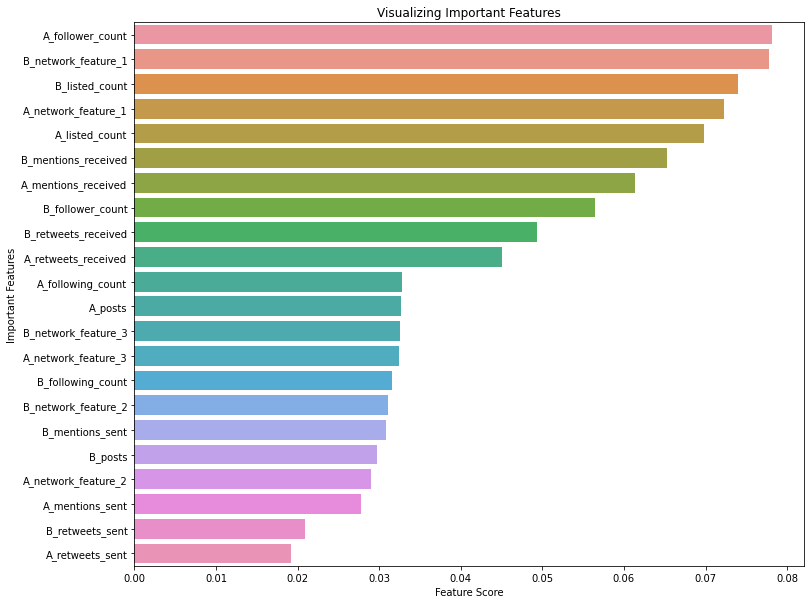

In [150]:
# Creating a barplot
fig_feat_imp = plt.figure(figsize= (12,10))
sns.barplot(x = A_feature_imp, y = A_feature_imp.index)
plt.xlabel('Feature Score')
plt.ylabel('Important Features')
plt.title('Visualizing Important Features')
# plt.legend()
plt.show()


The above diagram shows that none of the features are strong rather the dataset has very weak features. 

For datasets with weak features **Boosting** based classifiers gives best performance.

Here we'll be using *Gradient boost*

In [151]:
gbclf = GradientBoostingClassifier(n_estimators= 500,learning_rate=0.1, subsample=0.9, max_depth=2, max_features=15 )
gbclf.fit(X=ax_train, y=ay_train)
gbclf_ay_pred = gbclf.predict(ax_test)
acc_score['GB'] = accuracy_score(ay_test, gbclf_ay_pred)


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'GB': 0.7803636363636364, 'RFC': 0.7767272727272727}

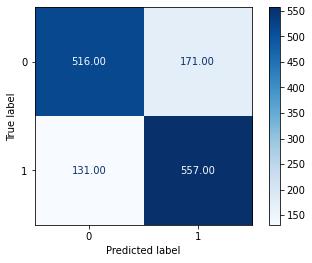

In [152]:
# Plotting Confusion Matrix
np.set_printoptions(precision=4,floatmode='fixed')
plot_confusion_matrix(gbclf,ax_test, ay_test,cmap=plt.cm.Blues,values_format='.2f', title = "Model A Confusion Matrix ")
                                 

## Model B Training

In [153]:
# Removing A_retweets_sent & B_retweets_sent
bx_train = ax_train.drop(['B_retweets_sent','A_retweets_sent'], axis = 1)
bx_test = ax_test.drop(['B_retweets_sent','A_retweets_sent'], axis = 1)

# No Change in Target column
by_train = ay_train
by_test = ay_test

In [154]:
# Model Training Stochiatic Gradient Boosting
B_gbclf = GradientBoostingClassifier(n_estimators= 500,learning_rate=0.1, subsample=0.8, max_depth=2, max_features=15)
B_gbclf.fit(X=bx_train, y=by_train)
gbclf_by_pred = B_gbclf.predict(bx_test)
acc_score['B_GB'] = accuracy_score(by_test, gbclf_by_pred)


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(0.5, 1.0, 'Model B Confusion Matrix ')

<Figure size 864x720 with 0 Axes>

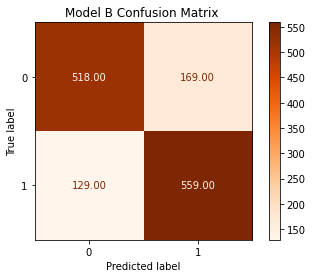

In [164]:
# Plotting Confusion Matrix
fig_B_conf_matrix = plt.figure(figsize= (12,10))
disp = plot_confusion_matrix(B_gbclf,bx_test, by_test,cmap=plt.cm.Oranges,values_format='.2f')
disp.ax_.set_title("Model B Confusion Matrix ")